<a href="https://colab.research.google.com/github/AtulADas/AtulADas/blob/main/Virat_Kohli_T20I_CareerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is an analysis of Virat Kohli's  T20I career. The purpose of this analysis is to give an inference about how his career in T20Is has progressed ever since his first match. The dataset used in this project is obtained from ESPNCricinfo.**

# **IMPORTING THE DATASET AND CONVERSION TO DATAFRAME**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded=files.upload()
VKdata=pd.read_excel(io.BytesIO(uploaded['VK Records.xlsx']))

Saving VK Records.xlsx to VK Records.xlsx


In [2]:
print(VKdata.head())#VKdata is a Dataframe created from an Excel File

       Runs Mins        BF  fours  sixes      SR                            \
0        26         30  21      3      1                            123.80   
1        28         28  19      5      0                            147.36   
2        14         15  12      2      0                            116.66   
3         4          5   5      0      0                             80.00   
4        15         21  16      3      0                             93.75   

    Pos  Innings      Opposition         Ground    Match Date  Notout  
0   5.0      2.0      v Zimbabwe         Harare   12 Jun 2010       1  
1   1.0      1.0  v South Africa         Durban    9 Jan 2011       0  
2   3.0      1.0   v West Indies  Port of Spain    4 Jun 2011       0  
3   4.0      1.0       v England     Manchester   31 Aug 2011       0  
4   3.0      1.0       v England        Kolkata  29 Oct 2011.       0  


# **DATA CLEANSING**

# The data cleansing part helps to visualize the data better.

In [3]:
VKdata=VKdata.drop('Innings',axis='columns')#Drop the Column Innings

In [4]:
print(VKdata.head()) #Prints the attributes with values but not in tabulated form

       Runs Mins        BF  fours  sixes      SR                            \
0        26         30  21      3      1                            123.80   
1        28         28  19      5      0                            147.36   
2        14         15  12      2      0                            116.66   
3         4          5   5      0      0                             80.00   
4        15         21  16      3      0                             93.75   

    Pos      Opposition         Ground    Match Date  Notout  
0   5.0      v Zimbabwe         Harare   12 Jun 2010       1  
1   1.0  v South Africa         Durban    9 Jan 2011       0  
2   3.0   v West Indies  Port of Spain    4 Jun 2011       0  
3   4.0       v England     Manchester   31 Aug 2011       0  
4   3.0       v England        Kolkata  29 Oct 2011.       0  


In [5]:
VKdata=VKdata.drop(' Pos',axis='columns')

In [6]:
VKdata #Tabulated form 

,Runs,Mins,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout
0,26,30,21,3,1,123.80,v Zimbabwe,Harare,12 Jun 2010,1
1,28,28,19,5,0,147.36,v South Africa,Durban,9 Jan 2011,0
2,14,15,12,2,0,116.66,v West Indies,Port of Spain,4 Jun 2011,0
3,4,5,5,0,0,80.00,v England,Manchester,31 Aug 2011,0
4,15,21,16,3,0,93.75,v England,Kolkata,29 Oct 2011.,0
...,...,...,...,...,...,...,...,...,...,...
102,62,79,44,3,2,140.90,v Netherlands,Sydney,27 Oct 2022,1
103,12,13,11,2,0,109.09,v South Africa,Perth,2022-10-30 00:00:00,0
104,64,84,44,8,1,145.45,v Bangladesh,Adelaide,2022-11-02 00:00:00,1
105,26,NaN,25,2,0,104.00,v Zimbabwe,Melbourne,2022-11-06 00:00:00,0


In [7]:
VKdata['Opposition']=VKdata['Opposition'].apply(lambda x:x[2:]) #Removes the 'v ' in Opposition and the apply function applies it to all values of the particular attribute(column)

In [8]:
VKdata

,Runs,Mins,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout
0,26,30,21,3,1,123.80,Zimbabwe,Harare,12 Jun 2010,1
1,28,28,19,5,0,147.36,South Africa,Durban,9 Jan 2011,0
2,14,15,12,2,0,116.66,West Indies,Port of Spain,4 Jun 2011,0
3,4,5,5,0,0,80.00,England,Manchester,31 Aug 2011,0
4,15,21,16,3,0,93.75,England,Kolkata,29 Oct 2011.,0
...,...,...,...,...,...,...,...,...,...,...
102,62,79,44,3,2,140.90,Netherlands,Sydney,27 Oct 2022,1
103,12,13,11,2,0,109.09,South Africa,Perth,2022-10-30 00:00:00,0
104,64,84,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02 00:00:00,1
105,26,NaN,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06 00:00:00,0


In [9]:
VKdata['Match Date']=pd.to_datetime(VKdata['Match Date']) #Converting  string  series to Datetime format

In [10]:
VKdata

,Runs,Mins,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout
0,26,30,21,3,1,123.80,Zimbabwe,Harare,2010-06-12,1
1,28,28,19,5,0,147.36,South Africa,Durban,2011-01-09,0
2,14,15,12,2,0,116.66,West Indies,Port of Spain,2011-06-04,0
3,4,5,5,0,0,80.00,England,Manchester,2011-08-31,0
4,15,21,16,3,0,93.75,England,Kolkata,2011-10-29,0
...,...,...,...,...,...,...,...,...,...,...
102,62,79,44,3,2,140.90,Netherlands,Sydney,2022-10-27,1
103,12,13,11,2,0,109.09,South Africa,Perth,2022-10-30,0
104,64,84,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02,1
105,26,NaN,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06,0


In [11]:
VKdata['year']=VKdata['Match Date'].dt.year.astype(int)

In [12]:
VKdata

,Runs,Mins,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout,year
0,26,30,21,3,1,123.80,Zimbabwe,Harare,2010-06-12,1,2010
1,28,28,19,5,0,147.36,South Africa,Durban,2011-01-09,0,2011
2,14,15,12,2,0,116.66,West Indies,Port of Spain,2011-06-04,0,2011
3,4,5,5,0,0,80.00,England,Manchester,2011-08-31,0,2011
4,15,21,16,3,0,93.75,England,Kolkata,2011-10-29,0,2011
...,...,...,...,...,...,...,...,...,...,...,...
102,62,79,44,3,2,140.90,Netherlands,Sydney,2022-10-27,1,2022
103,12,13,11,2,0,109.09,South Africa,Perth,2022-10-30,0,2022
104,64,84,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02,1,2022
105,26,NaN,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06,0,2022


In [13]:
print(VKdata.columns.tolist()) #List the columns of the Dataframe, can be used for Keyerror resolution

['    Runs', 'Mins      ', 'BF', 'fours', 'sixes', '    SR                          ', 'Opposition', 'Ground', 'Match Date', 'Notout', 'year']


In [14]:
VKdata

,Runs,Mins,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout,year
0,26,30,21,3,1,123.80,Zimbabwe,Harare,2010-06-12,1,2010
1,28,28,19,5,0,147.36,South Africa,Durban,2011-01-09,0,2011
2,14,15,12,2,0,116.66,West Indies,Port of Spain,2011-06-04,0,2011
3,4,5,5,0,0,80.00,England,Manchester,2011-08-31,0,2011
4,15,21,16,3,0,93.75,England,Kolkata,2011-10-29,0,2011
...,...,...,...,...,...,...,...,...,...,...,...
102,62,79,44,3,2,140.90,Netherlands,Sydney,2022-10-27,1,2022
103,12,13,11,2,0,109.09,South Africa,Perth,2022-10-30,0,2022
104,64,84,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02,1,2022
105,26,NaN,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06,0,2022


In [15]:
VKdata=VKdata.drop('Mins      ',axis='columns') #Updated the data frame as minutes was not necessary at all for the analysis    

In [16]:
VKdata #Displays the updated table

,Runs,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout,year
0,26,21,3,1,123.80,Zimbabwe,Harare,2010-06-12,1,2010
1,28,19,5,0,147.36,South Africa,Durban,2011-01-09,0,2011
2,14,12,2,0,116.66,West Indies,Port of Spain,2011-06-04,0,2011
3,4,5,0,0,80.00,England,Manchester,2011-08-31,0,2011
4,15,16,3,0,93.75,England,Kolkata,2011-10-29,0,2011
...,...,...,...,...,...,...,...,...,...,...
102,62,44,3,2,140.90,Netherlands,Sydney,2022-10-27,1,2022
103,12,11,2,0,109.09,South Africa,Perth,2022-10-30,0,2022
104,64,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02,1,2022
105,26,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06,0,2022


In [17]:
print(VKdata.columns.tolist()) #Displays the attributes remaining now

['    Runs', 'BF', 'fours', 'sixes', '    SR                          ', 'Opposition', 'Ground', 'Match Date', 'Notout', 'year']


In [18]:
VKdata

,Runs,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout,year
0,26,21,3,1,123.80,Zimbabwe,Harare,2010-06-12,1,2010
1,28,19,5,0,147.36,South Africa,Durban,2011-01-09,0,2011
2,14,12,2,0,116.66,West Indies,Port of Spain,2011-06-04,0,2011
3,4,5,0,0,80.00,England,Manchester,2011-08-31,0,2011
4,15,16,3,0,93.75,England,Kolkata,2011-10-29,0,2011
...,...,...,...,...,...,...,...,...,...,...
102,62,44,3,2,140.90,Netherlands,Sydney,2022-10-27,1,2022
103,12,11,2,0,109.09,South Africa,Perth,2022-10-30,0,2022
104,64,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02,1,2022
105,26,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06,0,2022


# **DATA ANALYSIS**

# Analysis of the data of Virat Kohli

In [19]:
VKdata

,Runs,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout,year
0,26,21,3,1,123.80,Zimbabwe,Harare,2010-06-12,1,2010
1,28,19,5,0,147.36,South Africa,Durban,2011-01-09,0,2011
2,14,12,2,0,116.66,West Indies,Port of Spain,2011-06-04,0,2011
3,4,5,0,0,80.00,England,Manchester,2011-08-31,0,2011
4,15,16,3,0,93.75,England,Kolkata,2011-10-29,0,2011
...,...,...,...,...,...,...,...,...,...,...
102,62,44,3,2,140.90,Netherlands,Sydney,2022-10-27,1,2022
103,12,11,2,0,109.09,South Africa,Perth,2022-10-30,0,2022
104,64,44,8,1,145.45,Bangladesh,Adelaide,2022-11-02,1,2022
105,26,25,2,0,104.00,Zimbabwe,Melbourne,2022-11-06,0,2022


In [20]:
result=VKdata.dtypes
print(result)

    Runs                                     int64
BF                                           int64
fours                                        int64
sixes                                        int64
    SR                                     float64
Opposition                                  object
Ground                                      object
Match Date                          datetime64[ns]
Notout                                       int64
year                                         int64
dtype: object


In [21]:
VKdata['sixes']=VKdata['sixes'].astype(int)#The sixes column was of object type and now we're updating it to integer64

In [22]:
result=VKdata.dtypes
print(result)#The sixes column is updated to int64 now

    Runs                                     int64
BF                                           int64
fours                                        int64
sixes                                        int64
    SR                                     float64
Opposition                                  object
Ground                                      object
Match Date                          datetime64[ns]
Notout                                       int64
year                                         int64
dtype: object


In [23]:
VKdata['    SR                          ']=VKdata['    SR                          '].astype(int)#Convert SR column to integer64

In [24]:
result=VKdata.dtypes
print(result)#The strike rate  column is updated to int64 now

    Runs                                     int64
BF                                           int64
fours                                        int64
sixes                                        int64
    SR                                       int64
Opposition                                  object
Ground                                      object
Match Date                          datetime64[ns]
Notout                                       int64
year                                         int64
dtype: object


In [25]:
first_match=VKdata['Match Date'].dt.date.min().strftime("%B %d,%Y")
print("First Match:",first_match)
last_match=VKdata['Match Date'].dt.date.max().strftime("%B %d,%Y")
print("Last Match:",last_match)
not_outs=VKdata['Notout'].sum()
print("Number of Not Outs:",not_outs)
total_runs=VKdata['    Runs'].sum()
print("Total Runs Scored in T20Is:",total_runs)
no_of_fours=VKdata['fours'].sum()
print("Total Number of Fours:",no_of_fours)
total_sixes=VKdata['sixes'].sum()
print('Total Number of sixes:',total_sixes)
no_of_fifties=(VKdata[(VKdata['    Runs']>=50)&(VKdata['    Runs']<100)].shape[0])#Choose all the values satisfying the condition
print('Total Number of fifties:',no_of_fifties)
centuries=VKdata[(VKdata['    Runs']>=100)].shape[0]
print('Total Number of Centuries:',centuries)
no_of_innings_played=len(VKdata)#Consider the total number of rows in the Dataframe
print('Number of innings played:',no_of_innings_played)
print('Average Strike Rate:',(VKdata['    SR                          '].sum())/no_of_innings_played)
print('Career Average including not outs:',total_runs/(no_of_innings_played))
print('Actual Career Average:',total_runs/(no_of_innings_played-not_outs))

First Match: June 12,2010
Last Match: November 10,2022
Number of Not Outs: 30
Total Runs Scored in T20Is: 4008
Total Number of Fours: 361
Total Number of sixes: 122
Total Number of fifties: 37
Total Number of Centuries: 1
Number of innings played: 107
Average Strike Rate: 123.90654205607477
Career Average including not outs: 37.45794392523364
Actual Career Average: 52.05194805194805


# **ANALYSIS USING GRAPHS AND TESTS**



# Helps in better visualization of his career

# TOTAL MATCHES PLAYED AGAINST EVERY TEAM

In [26]:
newdata1=VKdata['Opposition'].value_counts()#Unique values will be considered and frequency is assessed and it creates a dataframe

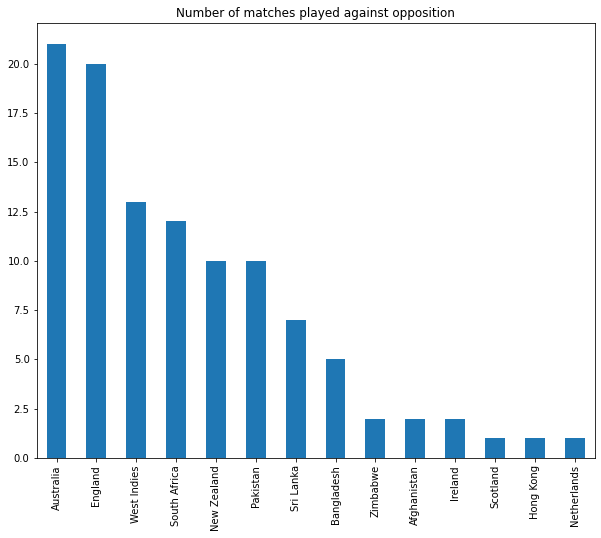

In [27]:
newdata=VKdata['Opposition'].value_counts().plot(kind='bar',title='Number of matches played against opposition',figsize=(10,8))#Here VKdata['Opposition'].value_counts() is a new dataframe and we consider this dataframe to do the plot width=10, height=5

In [28]:
newdata1

Australia       21
England         20
West Indies     13
South Africa    12
New Zealand     10
Pakistan        10
Sri Lanka        7
Bangladesh       5
Zimbabwe         2
Afghanistan      2
Ireland          2
Scotland         1
Hong Kong        1
Netherlands      1
Name: Opposition, dtype: int64

We can infer from the above that Kohli has played the most number of matches in his career against Australia.

# INNINGS PLAYED PER YEAR

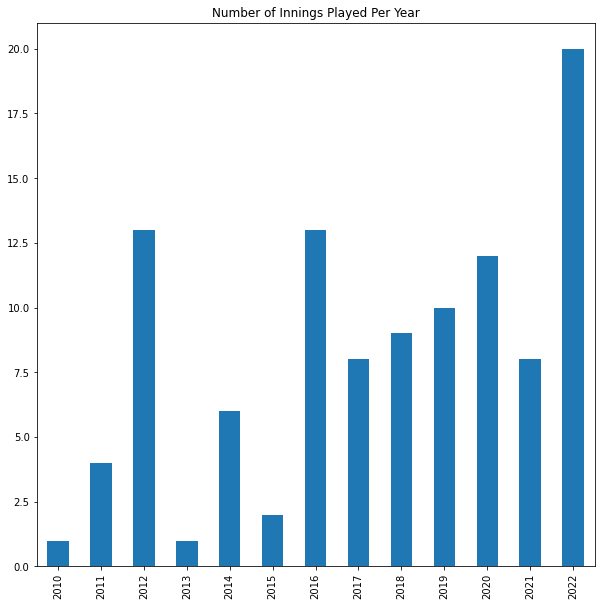

In [29]:
VKdata['year'].value_counts().sort_index().plot(kind='bar',title='Number of Innings Played Per Year',figsize=(10,10))

We can infer from the above that till now he has played the most number of innings in the year 2022.

# NUMBER OF RUNS SCORED PER YEAR

In [30]:
a=VKdata.groupby('year')#Groups all the data by the year attribute

In [31]:
a.first()#Gives the first value of every grouping

,Runs,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout
year,,,,,,,,,
2010,26,21,3,1,123,Zimbabwe,Harare,2010-06-12 00:00:00,1
2011,28,19,5,0,147,South Africa,Durban,2011-01-09 00:00:00,0
2012,22,21,0,1,104,Australia,Sydney,2012-02-01 00:00:00,0
2013,29,22,2,1,131,Australia,Rajkot,2013-10-10 00:00:00,0
2014,54,41,5,1,131,West Indies,Mirpur,2014-03-23 00:00:00,0
2015,43,27,1,3,159,South Africa,Dharamsala,2015-10-02 00:00:00,0
2016,90,55,9,2,163,Australia,Adelaide,2016-01-26 00:00:00,1
2017,29,26,4,0,111,England,Kanpur,2017-01-26 00:00:00,0
2018,26,20,2,1,130,South Africa,Johannesburg,2018-02-18 00:00:00,0


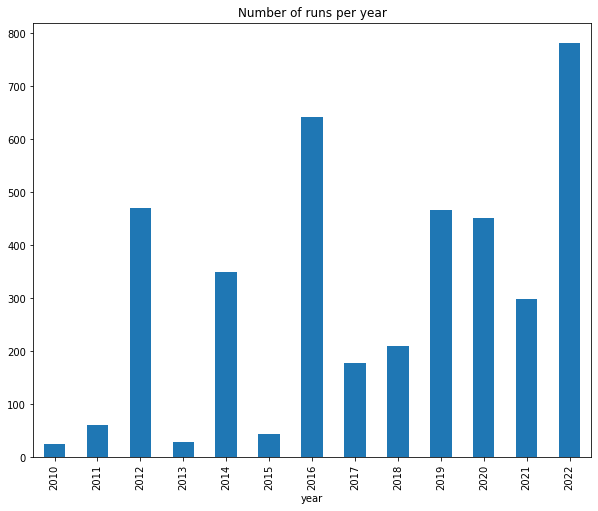

In [32]:
a['    Runs'].sum().plot(kind='bar',title='Number of runs per year',figsize=(10,8))

In [33]:
total_runs_scored_per_year=a['    Runs'].sum()

In [34]:
total_runs_scored_per_year

year
2010     26
2011     61
2012    471
2013     29
2014    349
2015     44
2016    641
2017    178
2018    211
2019    466
2020    452
2021    299
2022    781
Name:     Runs, dtype: int64

By the Graph and The Above values, we can conclude that till now 2022 is the year in which Kohli has scored the maximum number of runs

## NUMBER OF RUNS SCORED AGAINST EACH OPPOSITION

In [35]:
b=VKdata.groupby('Opposition')

In [36]:
b.first()

,Runs,BF,fours,sixes,SR,Ground,Match Date,Notout,year
Opposition,,,,,,,,,
Afghanistan,50,39,4,7,128,Colombo (RPS),2012-09-19,0,2012
Australia,22,21,0,1,104,Sydney,2012-02-01,0,2012
Bangladesh,57,50,3,1,114,Mirpur,2014-03-28,1,2014
England,4,5,0,0,80,Manchester,2011-08-31,0,2011
Hong Kong,59,44,1,3,134,Dubai (DSC),2022-08-31,1,2022
Ireland,0,2,0,0,0,Dublin (Malahide),2018-06-27,0,2018
Netherlands,62,44,3,2,140,Sydney,2022-10-27,1,2022
New Zealand,70,41,10,1,170,Chennai,2012-09-11,0,2012
Pakistan,78,61,8,2,127,Colombo (RPS),2012-09-30,1,2012


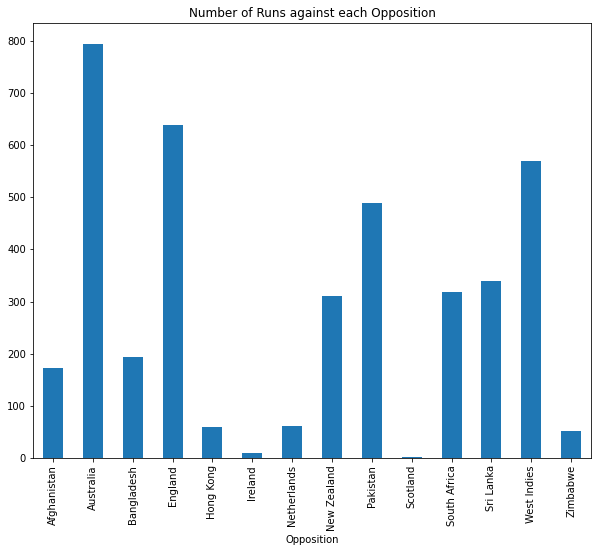

In [37]:
b['    Runs'].sum().plot(kind='bar',title='Number of Runs against each Opposition',figsize=(10,8))

In [38]:
b['    Runs'].sum()

Opposition
Afghanistan     172
Australia       794
Bangladesh      193
England         639
Hong Kong        59
Ireland           9
Netherlands      62
New Zealand     311
Pakistan        488
Scotland          2
South Africa    318
Sri Lanka       339
West Indies     570
Zimbabwe         52
Name:     Runs, dtype: int64

We can conclude that Virat Kohli has scored the maximum number of runs against Australia.

# TOTAL RUNS IN ALL STADIUMS

In [39]:
c=VKdata.groupby('Ground')

In [40]:
c.first()#Displays the first of all the values

,Runs,BF,fours,sixes,SR,Opposition,Match Date,Notout,year
Ground,,,,,,,,,
Adelaide,90,55,9,2,163,Australia,2016-01-26 00:00:00,1,2016
Ahmedabad,27,22,3,0,122,Pakistan,2012-12-28 00:00:00,0,2012
Auckland,45,32,3,1,140,New Zealand,2020-01-24 00:00:00,0,2020
Bengaluru,9,11,1,0,81,Pakistan,2012-12-25 00:00:00,0,2012
Birmingham,66,41,9,1,160,England,2014-09-07 00:00:00,0,2014
Brisbane,4,8,0,0,50,Australia,2018-11-21 00:00:00,0,2018
Bristol,43,29,2,2,148,England,2018-07-08 00:00:00,0,2018
Canberra,9,9,1,0,100,Australia,2020-12-04 00:00:00,0,2020
Cardiff,47,38,1,2,123,England,2018-07-06 00:00:00,0,2018


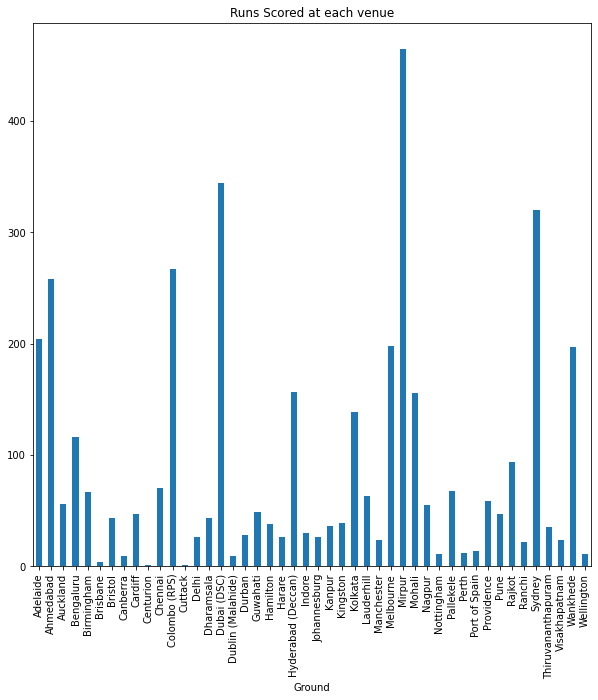

In [41]:
c['    Runs'].sum().plot(kind='bar',title='Runs Scored at each venue',figsize=(10,10))

# AVERAGE AGAINST ALL TEAMS

In [42]:
runs_scored_opposition=pd.DataFrame(b['    Runs'].sum())
runs_scored_opposition

,Runs
Opposition,
Afghanistan,172
Australia,794
Bangladesh,193
England,639
Hong Kong,59
Ireland,9
Netherlands,62
New Zealand,311
Pakistan,488


In [43]:
total_innings_played=pd.DataFrame(b['Match Date'].count())
not_outs=pd.DataFrame(b['Notout'].sum())
total_innings_played


,Match Date
Opposition,
Afghanistan,2
Australia,21
Bangladesh,5
England,20
Hong Kong,1
Ireland,2
Netherlands,1
New Zealand,10
Pakistan,10


In [44]:
not_outs

,Notout
Opposition,
Afghanistan,1
Australia,6
Bangladesh,3
England,4
Hong Kong,1
Ireland,0
Netherlands,1
New Zealand,0
Pakistan,4


In [45]:
temp=runs_scored_opposition.merge(total_innings_played,left_index=True,right_index=True)

In [46]:
temp

,Runs,Match Date
Opposition,,
Afghanistan,172,2
Australia,794,21
Bangladesh,193,5
England,639,20
Hong Kong,59,1
Ireland,9,2
Netherlands,62,1
New Zealand,311,10
Pakistan,488,10


In [47]:
avg=temp.merge(not_outs,left_index=True,right_index=True)
avg

,Runs,Match Date,Notout
Opposition,,,
Afghanistan,172,2,1
Australia,794,21,6
Bangladesh,193,5,3
England,639,20,4
Hong Kong,59,1,1
Ireland,9,2,0
Netherlands,62,1,1
New Zealand,311,10,0
Pakistan,488,10,4


In [48]:
avg['eff_inns']=avg['Match Date']-avg['Notout']

In [49]:
avg

,Runs,Match Date,Notout,eff_inns
Opposition,,,,
Afghanistan,172,2,1,1
Australia,794,21,6,15
Bangladesh,193,5,3,2
England,639,20,4,16
Hong Kong,59,1,1,0
Ireland,9,2,0,2
Netherlands,62,1,1,0
New Zealand,311,10,0,10
Pakistan,488,10,4,6


In [50]:
avg['avg_against_opposition']=avg['    Runs']/avg['eff_inns']

In [51]:
type(avg['avg_against_opposition'])

pandas.core.series.Series

In [52]:
avg

,Runs,Match Date,Notout,eff_inns,avg_against_opposition
Opposition,,,,,
Afghanistan,172,2,1,1,172.000000
Australia,794,21,6,15,52.933333
Bangladesh,193,5,3,2,96.500000
England,639,20,4,16,39.937500
Hong Kong,59,1,1,0,inf
Ireland,9,2,0,2,4.500000
Netherlands,62,1,1,0,inf
New Zealand,311,10,0,10,31.100000
Pakistan,488,10,4,6,81.333333


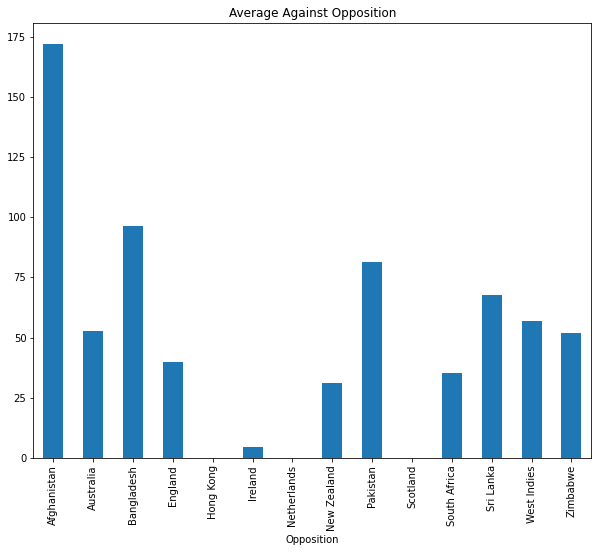

In [53]:
avg['avg_against_opposition'].plot(kind='bar',title='Average Against Opposition',figsize=(10,8))#The average against Netherlands and Scotland is infinite as he has not got out against these two teams

# PIE CHART SHOWING THE PERCENTAGE OF FOURS AND SIXES IN HIS CAREER

In [54]:
print(no_of_fours)
print(total_sixes)

361
122


In [55]:
import plotly.express as px#An interactive Pie Plot is created
import numpy
boundaries=['FOURS','SIXES']
values=[no_of_fours,total_sixes]
fig = px.pie(values=values,names=boundaries)
fig.show()


#INTERACTIVE TIME SERIES GRAPH


In [56]:
a.first()

,Runs,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout
year,,,,,,,,,
2010,26,21,3,1,123,Zimbabwe,Harare,2010-06-12 00:00:00,1
2011,28,19,5,0,147,South Africa,Durban,2011-01-09 00:00:00,0
2012,22,21,0,1,104,Australia,Sydney,2012-02-01 00:00:00,0
2013,29,22,2,1,131,Australia,Rajkot,2013-10-10 00:00:00,0
2014,54,41,5,1,131,West Indies,Mirpur,2014-03-23 00:00:00,0
2015,43,27,1,3,159,South Africa,Dharamsala,2015-10-02 00:00:00,0
2016,90,55,9,2,163,Australia,Adelaide,2016-01-26 00:00:00,1
2017,29,26,4,0,111,England,Kanpur,2017-01-26 00:00:00,0
2018,26,20,2,1,130,South Africa,Johannesburg,2018-02-18 00:00:00,0


In [57]:
df=a['    Runs'].sum().reset_index(name='Runs')
df

,year,Runs
0,2010,26
1,2011,61
2,2012,471
3,2013,29
4,2014,349
5,2015,44
6,2016,641
7,2017,178
8,2018,211
9,2019,466


In [58]:
df2=a['    SR                          '].sum().reset_index(name='Strike Rate')

In [59]:
df2

,year,Strike Rate
0,2010,123
1,2011,436
2,2012,1588
3,2013,131
4,2014,804
5,2015,259
6,2016,1757
7,2017,1064
8,2018,821
9,2019,1385


In [60]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [61]:
df3=pd.DataFrame(a['Match Date'].count()).reset_index()
df3

,year,Match Date
0,2010,1
1,2011,4
2,2012,13
3,2013,1
4,2014,6
5,2015,2
6,2016,13
7,2017,8
8,2018,9
9,2019,10


In [62]:
print(type(df3))

<class 'pandas.core.frame.DataFrame'>


In [63]:
df3.columns.tolist()

['year', 'Match Date']

In [64]:
df2.columns.tolist()

['year', 'Strike Rate']

In [65]:
df4=df2.merge(df3,left_index=True,right_index=True)

In [66]:
df4

,year_x,Strike Rate,year_y,Match Date
0,2010,123,2010,1
1,2011,436,2011,4
2,2012,1588,2012,13
3,2013,131,2013,1
4,2014,804,2014,6
5,2015,259,2015,2
6,2016,1757,2016,13
7,2017,1064,2017,8
8,2018,821,2018,9
9,2019,1385,2019,10


In [67]:
df4=df4.drop("year_y",axis='columns')

In [68]:
df4

,year_x,Strike Rate,Match Date
0,2010,123,1
1,2011,436,4
2,2012,1588,13
3,2013,131,1
4,2014,804,6
5,2015,259,2
6,2016,1757,13
7,2017,1064,8
8,2018,821,9
9,2019,1385,10


In [69]:
df4

,year_x,Strike Rate,Match Date
0,2010,123,1
1,2011,436,4
2,2012,1588,13
3,2013,131,1
4,2014,804,6
5,2015,259,2
6,2016,1757,13
7,2017,1064,8
8,2018,821,9
9,2019,1385,10


In [70]:
df4['Average SR']=df4['Strike Rate']/df4['Match Date']

In [71]:
import plotly.express as px
fig=px.line(df,x='year',y='Runs')
fig.add_scatter(x=df4['year_x'],y=df4['Average SR'])
fig.show()

#CHI SQUARE TESTS

In [72]:
VKdata['Opposition'].value_counts()

Australia       21
England         20
West Indies     13
South Africa    12
New Zealand     10
Pakistan        10
Sri Lanka        7
Bangladesh       5
Zimbabwe         2
Afghanistan      2
Ireland          2
Scotland         1
Hong Kong        1
Netherlands      1
Name: Opposition, dtype: int64

In [73]:
VKdata['year'].value_counts()

2022    20
2012    13
2016    13
2020    12
2019    10
2018     9
2017     8
2021     8
2014     6
2011     4
2015     2
2010     1
2013     1
Name: year, dtype: int64

In [74]:
from scipy.stats import chi2_contingency
VKcrosstab=pd.crosstab(VKdata['Opposition'],VKdata['year'])
VKcrosstab

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Opposition,,,,,,,,,,,,,
Afghanistan,0,0,1,0,0,0,0,0,0,0,0,0,1
Australia,0,0,3,1,1,0,4,2,2,2,3,0,3
Bangladesh,0,0,0,0,1,0,3,0,0,0,0,0,1
England,0,2,3,0,1,0,0,3,3,0,0,5,3
Hong Kong,0,0,0,0,0,0,0,0,0,0,0,0,1
Ireland,0,0,0,0,0,0,0,0,2,0,0,0,0
Netherlands,0,0,0,0,0,0,0,0,0,0,0,0,1
New Zealand,0,0,1,0,0,0,1,3,0,0,4,1,0
Pakistan,0,0,3,0,0,0,2,0,0,0,1,1,3


In [75]:
chi2_contingency(VKcrosstab)

(228.2795722582261,
 0.00014366545044510546,
 156,
 array([[0.01869159, 0.07476636, 0.24299065, 0.01869159, 0.11214953,
         0.03738318, 0.24299065, 0.14953271, 0.1682243 , 0.18691589,
         0.22429907, 0.14953271, 0.37383178],
        [0.19626168, 0.78504673, 2.55140187, 0.19626168, 1.17757009,
         0.39252336, 2.55140187, 1.57009346, 1.76635514, 1.96261682,
         2.35514019, 1.57009346, 3.92523364],
        [0.04672897, 0.18691589, 0.60747664, 0.04672897, 0.28037383,
         0.09345794, 0.60747664, 0.37383178, 0.42056075, 0.46728972,
         0.56074766, 0.37383178, 0.93457944],
        [0.18691589, 0.74766355, 2.42990654, 0.18691589, 1.12149533,
         0.37383178, 2.42990654, 1.4953271 , 1.68224299, 1.86915888,
         2.24299065, 1.4953271 , 3.73831776],
        [0.00934579, 0.03738318, 0.12149533, 0.00934579, 0.05607477,
         0.01869159, 0.12149533, 0.07476636, 0.08411215, 0.09345794,
         0.11214953, 0.07476636, 0.18691589],
        [0.01869159, 0.074766

# **FISHER TEST**

Let's check if there is any association between any two attributes of the dataset

In [76]:
VKdata

,Runs,BF,fours,sixes,SR,Opposition,Ground,Match Date,Notout,year
0,26,21,3,1,123,Zimbabwe,Harare,2010-06-12,1,2010
1,28,19,5,0,147,South Africa,Durban,2011-01-09,0,2011
2,14,12,2,0,116,West Indies,Port of Spain,2011-06-04,0,2011
3,4,5,0,0,80,England,Manchester,2011-08-31,0,2011
4,15,16,3,0,93,England,Kolkata,2011-10-29,0,2011
...,...,...,...,...,...,...,...,...,...,...
102,62,44,3,2,140,Netherlands,Sydney,2022-10-27,1,2022
103,12,11,2,0,109,South Africa,Perth,2022-10-30,0,2022
104,64,44,8,1,145,Bangladesh,Adelaide,2022-11-02,1,2022
105,26,25,2,0,104,Zimbabwe,Melbourne,2022-11-06,0,2022


In [77]:
VKdata.dtypes

    Runs                                     int64
BF                                           int64
fours                                        int64
sixes                                        int64
    SR                                       int64
Opposition                                  object
Ground                                      object
Match Date                          datetime64[ns]
Notout                                       int64
year                                         int64
dtype: object

In [78]:
VKdata.columns.tolist()

['    Runs',
 'BF',
 'fours',
 'sixes',
 '    SR                          ',
 'Opposition',
 'Ground',
 'Match Date',
 'Notout',
 'year']

In [79]:
import scipy.stats as stats

 


# **VALUE PREDICTIONS**

In this section we train a Linear Regression model and we predict values using that model

## **PREDICTING TOTAL RUNS BASED ON THE YEAR(Single Linear Regression)**

In [134]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs
0,2010,123,1,123.000000,26
1,2011,436,4,109.000000,61
2,2012,1588,13,122.153846,471
3,2013,131,1,131.000000,29
4,2014,804,6,134.000000,349
5,2015,259,2,129.500000,44
6,2016,1757,13,135.153846,641
7,2017,1064,8,133.000000,178
8,2018,821,9,91.222222,211
9,2019,1385,10,138.500000,466


In [135]:
df4.rename(columns={'year_x':'Year'},inplace=True)

In [136]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs
0,2010,123,1,123.000000,26
1,2011,436,4,109.000000,61
2,2012,1588,13,122.153846,471
3,2013,131,1,131.000000,29
4,2014,804,6,134.000000,349
5,2015,259,2,129.500000,44
6,2016,1757,13,135.153846,641
7,2017,1064,8,133.000000,178
8,2018,821,9,91.222222,211
9,2019,1385,10,138.500000,466


In [137]:
df4=df4.merge(df,left_index=True,right_index=True)

In [138]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs_x,year,Runs_y
0,2010,123,1,123.000000,26,2010,26
1,2011,436,4,109.000000,61,2011,61
2,2012,1588,13,122.153846,471,2012,471
3,2013,131,1,131.000000,29,2013,29
4,2014,804,6,134.000000,349,2014,349
5,2015,259,2,129.500000,44,2015,44
6,2016,1757,13,135.153846,641,2016,641
7,2017,1064,8,133.000000,178,2017,178
8,2018,821,9,91.222222,211,2018,211
9,2019,1385,10,138.500000,466,2019,466


In [139]:
df4=df4.drop('year',axis='columns')

In [140]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs_x,Runs_y
0,2010,123,1,123.000000,26,26
1,2011,436,4,109.000000,61,61
2,2012,1588,13,122.153846,471,471
3,2013,131,1,131.000000,29,29
4,2014,804,6,134.000000,349,349
5,2015,259,2,129.500000,44,44
6,2016,1757,13,135.153846,641,641
7,2017,1064,8,133.000000,178,178
8,2018,821,9,91.222222,211,211
9,2019,1385,10,138.500000,466,466


In [141]:
x=df4.iloc[:,:1].values
print(x)

[[2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]


In [142]:
y=df4.iloc[:,4].values
print(y)

[ 26  61 471  29 349  44 641 178 211 466 452 299 781]


In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=2/4)
print(X_train)

[[2021]
 [2013]
 [2018]
 [2020]
 [2022]
 [2014]]


In [144]:
print(X_test)

[[2010]
 [2017]
 [2015]
 [2011]
 [2019]
 [2016]
 [2012]]


In [145]:
print(Y_train)

[299  29 211 452 781 349]


In [146]:
print(Y_test)

[ 26 178  44  61 466 641 471]


Training the Model

In [147]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

Visualize the Training Set result

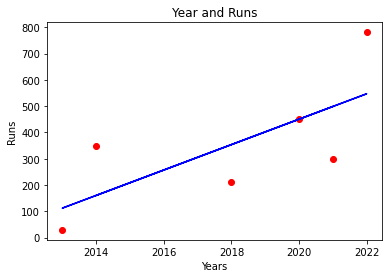

In [148]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='Blue')
plt.title("Year and Runs")
plt.xlabel('Years')
plt.ylabel('Runs')
plt.show()

Predicting in Test Data

In [149]:
y_pred=regressor.predict(X_test)
y_pred

array([-33.24285714, 305.15714286, 208.47142857,  15.1       ,
       401.84285714, 256.81428571,  63.44285714])

Visualizing the results in testing data

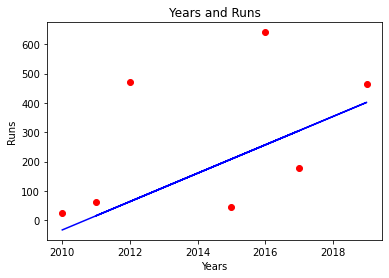

In [150]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='Blue')
plt.title("Years and Runs")
plt.xlabel('Years')
plt.ylabel('Runs')
plt.show()

In [151]:
print(regressor.predict([[2023]]))

[595.21428571]


In [152]:
sse=np.sum(y_pred-Y_test)**2
sse

448115.48591840797

In [155]:
import numpy as np
print("Pearson's coefficient of correlation",regressor.coef_)

Pearson's coefficient of correlation [48.34285714]


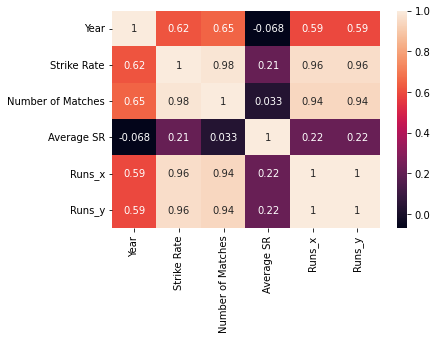

In [156]:
import seaborn as sns
sns.heatmap(df4.corr(),annot=True)


By the HeatMap we can infer that Runs and Strike Rate have a great positive correlation

In [157]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs_x,Runs_y
0,2010,123,1,123.000000,26,26
1,2011,436,4,109.000000,61,61
2,2012,1588,13,122.153846,471,471
3,2013,131,1,131.000000,29,29
4,2014,804,6,134.000000,349,349
5,2015,259,2,129.500000,44,44
6,2016,1757,13,135.153846,641,641
7,2017,1064,8,133.000000,178,178
8,2018,821,9,91.222222,211,211
9,2019,1385,10,138.500000,466,466


In [158]:
df4.rename(columns={'Match Date':'Number of Matches'},inplace=True)

In [159]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs_x,Runs_y
0,2010,123,1,123.000000,26,26
1,2011,436,4,109.000000,61,61
2,2012,1588,13,122.153846,471,471
3,2013,131,1,131.000000,29,29
4,2014,804,6,134.000000,349,349
5,2015,259,2,129.500000,44,44
6,2016,1757,13,135.153846,641,641
7,2017,1064,8,133.000000,178,178
8,2018,821,9,91.222222,211,211
9,2019,1385,10,138.500000,466,466


In [160]:
df4.columns.to_list()

['Year', 'Strike Rate', 'Number of Matches', 'Average SR', 'Runs_x', 'Runs_y']

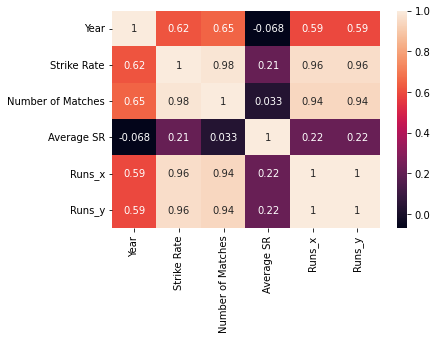

In [161]:
import seaborn as sns
sns.heatmap(df4.corr(),annot=True)

## **MULTIPLE LINEAR REGRESSION(Considering Average Strike Rate and Total Matches played, predicting the number of runs)**

In [162]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs_x,Runs_y
0,2010,123,1,123.000000,26,26
1,2011,436,4,109.000000,61,61
2,2012,1588,13,122.153846,471,471
3,2013,131,1,131.000000,29,29
4,2014,804,6,134.000000,349,349
5,2015,259,2,129.500000,44,44
6,2016,1757,13,135.153846,641,641
7,2017,1064,8,133.000000,178,178
8,2018,821,9,91.222222,211,211
9,2019,1385,10,138.500000,466,466


In [163]:
df4.rename(columns={'Runs_x':'Runs'},inplace=True)

In [166]:
df4=df4.drop('Runs_y',axis=True)

In [167]:
df4

,Year,Strike Rate,Number of Matches,Average SR,Runs
0,2010,123,1,123.000000,26
1,2011,436,4,109.000000,61
2,2012,1588,13,122.153846,471
3,2013,131,1,131.000000,29
4,2014,804,6,134.000000,349
5,2015,259,2,129.500000,44
6,2016,1757,13,135.153846,641
7,2017,1064,8,133.000000,178
8,2018,821,9,91.222222,211
9,2019,1385,10,138.500000,466


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
x=df4[['Number of Matches','Average SR']]
y=df4[['Runs']]

In [170]:
x

,Number of Matches,Average SR
0,1,123.000000
1,4,109.000000
2,13,122.153846
3,1,131.000000
4,6,134.000000
5,2,129.500000
6,13,135.153846
7,8,133.000000
8,9,91.222222
9,10,138.500000


In [171]:
y

,Runs
0,26
1,61
2,471
3,29
4,349
5,44
6,641
7,178
8,211
9,466


Training the model

In [172]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x.values,y.values)

LinearRegression()

Testing the model

In [175]:
print(regressor.predict([[10,212]]))

[[654.96745202]]


In [173]:
print(regressor.predict([[13,120]]))

[[494.85129559]]


In [174]:
print(regressor.predict([[12,50.5]]))

[[238.51445952]]


In [130]:
print(regressor.predict([[9,212]]))

[[613.52014405]]


In [179]:
print(regressor.predict([[9,213]]))

[[616.6120797]]


In [132]:
print(regressor.predict([[9,214]]))

[[619.70401536]]


In [177]:
print(regressor.predict([[10,214]]))

[[661.15132334]]


In [178]:
print(regressor.predict([[10,213]]))

[[658.05938768]]


Coefficient of correlation

In [180]:
print(regressor.coef_)

[[41.44730798  3.09193566]]


The above shows that for every increase in the number of matches, the runs increase by 41 but whereas if the number of matches are same but average strike rate increases there is an increase of 3 approximately